In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/msbd5001-spring-2022/sample_submission.csv
/kaggle/input/msbd5001-spring-2022/train.csv
/kaggle/input/msbd5001-spring-2022/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
features = pd.read_csv("../input/msbd5001-spring-2022/train.csv")

In [4]:
features.shape

(87, 13)

In [5]:
features.loc[38:40]

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
38,38,1010.0,1384.0,570.13,312.90,233.84,80.17,31.18,702.08,56,1,5501.0,1
39,39,NaN,NaN,1336.54,739.71,550.30,68.46,192.07,1615.68,21,0,NaN,0
40,40,1024.0,180.0,858.48,673.32,185.61,213.96,50.06,1129.59,47,0,1953.0,0


In [6]:
# features.isnull().values.any()
# features.isnull().sum().sum()

features_with_NAN = features.isna().any()

for i in range (0, len(features_with_NAN)):

    if (features_with_NAN[i] == True) :
        print (features_with_NAN[i])

       #  print(features.columns[i])

        mean_value=features[features.columns[i]].mean()

        features[features.columns[i]].fillna(value=mean_value, inplace=True)

        #mean_value=features['Neu CD64+MFI (cells/ul)'].mean()
        #features['Neu CD64+MFI (cells/ul)'].fillna(value=mean_value, inplace=True)

        #mean_value=features['Mono CD64+MFI (cells/ul)'].mean()
        #features['Mono CD64+MFI (cells/ul)'].fillna(value=mean_value, inplace=True)

True
True
True


In [7]:
features.loc[38:40]

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
38,38,1010.000000,1384.000000,570.13,312.90,233.84,80.17,31.18,702.08,56,1,5501.000000,1
39,39,1264.244186,290.383721,1336.54,739.71,550.30,68.46,192.07,1615.68,21,0,2066.534884,0
40,40,1024.000000,180.000000,858.48,673.32,185.61,213.96,50.06,1129.59,47,0,1953.000000,0


In [8]:
  features.loc[39:40]

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
39,39,1264.244186,290.383721,1336.54,739.71,550.30,68.46,192.07,1615.68,21,0,2066.534884,0
40,40,1024.000000,180.000000,858.48,673.32,185.61,213.96,50.06,1129.59,47,0,1953.000000,0


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        87 non-null     int64  
 1   MO HLADR+ MFI (cells/ul)  87 non-null     float64
 2   Neu CD64+MFI (cells/ul)   87 non-null     float64
 3   CD3+T (cells/ul)          87 non-null     float64
 4   CD8+T (cells/ul)          87 non-null     float64
 5   CD4+T (cells/ul)          87 non-null     float64
 6   NK (cells/ul)             87 non-null     float64
 7   CD19+ (cells/ul)          87 non-null     float64
 8   CD45+ (cells/ul)          87 non-null     float64
 9   Age                       87 non-null     int64  
 10  Sex 0M1F                  87 non-null     int64  
 11  Mono CD64+MFI (cells/ul)  87 non-null     float64
 12  label                     87 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 9.0 KB


In [10]:
 features.head(40)

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
0,0,3556.000000,2489.000000,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.000000,1
1,1,1906.000000,134.000000,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.000000,0
2,2,1586.000000,71.000000,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.000000,0
3,3,683.000000,94.000000,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.000000,0
4,4,1032.000000,71.000000,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.000000,0
5,5,495.000000,143.000000,1719.32,885.94,842.94,271.42,119.46,2143.66,42,1,1827.000000,1
6,6,1517.000000,76.000000,813.73,541.23,276.28,258.81,82.81,1179.27,42,0,1784.000000,0
7,7,2623.000000,126.000000,642.98,329.66,316.59,167.89,85.38,899.51,41,0,1620.000000,0
8,8,2318.000000,150.000000,2679.19,1120.76,1415.44,285.99,342.02,3347.78,21,1,1642.000000,0
9,9,1412.000000,243.000000,1177.19,684.42,490.50,185.30,67.22,1441.06,36,1,1213.000000,0


In [11]:
print('The shape of our features is:', features.shape)

The shape of our features is: (87, 13)


In [12]:

test_features = pd.read_csv('../input/msbd5001-spring-2022/test.csv')
#features.head(5)

In [13]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
train_labels = features.loc[:,['label']]

train_labels = train_labels.astype(str)

# Remove the labels from the features
# axis 1 refers to the columns
#features= features.drop('label', axis = 1)

#Variable: Neu CD64+MFI (cells/ul) Importance: 0.61
#Variable: NK (cells/ul)        Importance: 0.11
#Variable: MO HLADR+ MFI (cells/ul) Importance: 0.05
#Variable: CD19+ (cells/ul)     Importance: 0.05
#Variable: Mono CD64+MFI (cells/ul) Importance: 0.05
#Variable: id                   Importance: 0.04
#Variable: CD45+ (cells/ul)     Importance: 0.03
#Variable: CD8+T (cells/ul)     Importance: 0.02



train_features = features.loc[:,    ['Neu CD64+MFI (cells/ul)','NK (cells/ul)', 'MO HLADR+ MFI (cells/ul)', 'CD19+ (cells/ul)','Mono CD64+MFI (cells/ul)','CD45+ (cells/ul)','CD8+T (cells/ul)','Sex 0M1F','CD3+T (cells/ul)','CD4+T (cells/ul)','Age']]  

test_features = test_features.loc[:,['Neu CD64+MFI (cells/ul)','NK (cells/ul)', 'MO HLADR+ MFI (cells/ul)', 'CD19+ (cells/ul)','Mono CD64+MFI (cells/ul)','CD45+ (cells/ul)','CD8+T (cells/ul)','Sex 0M1F','CD3+T (cells/ul)','CD4+T (cells/ul)','Age']]


In [14]:
# Descriptive statistics for each column
train_features.describe()

,Neu CD64+MFI (cells/ul),NK (cells/ul),MO HLADR+ MFI (cells/ul),CD19+ (cells/ul),Mono CD64+MFI (cells/ul),CD45+ (cells/ul),CD8+T (cells/ul),Sex 0M1F,CD3+T (cells/ul),CD4+T (cells/ul),Age
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,290.383721,212.732874,1264.244186,118.780920,2066.534884,1325.096437,479.340920,0.482759,982.570115,494.904023,40.218391
std,487.424679,173.553264,760.989059,96.218344,1191.413541,791.602538,344.326452,0.502599,617.332545,311.836604,10.461919
min,30.000000,0.000000,112.000000,4.200000,72.000000,209.250000,36.610000,0.000000,74.400000,39.590000,19.000000
25%,78.000000,78.815000,688.000000,52.425000,1479.500000,780.615000,237.920000,0.000000,549.390000,272.745000,33.000000
50%,125.000000,188.780000,1117.000000,89.790000,1759.000000,1179.270000,423.270000,0.000000,871.710000,459.720000,41.000000
75%,246.500000,262.845000,1597.500000,155.450000,2228.500000,1617.725000,624.450000,1.000000,1268.085000,624.360000,49.500000
max,3124.000000,878.040000,4145.000000,485.860000,7515.000000,4757.280000,2548.100000,1.000000,3791.230000,1517.810000,60.000000


In [15]:
test_features.describe()

,Neu CD64+MFI (cells/ul),NK (cells/ul),MO HLADR+ MFI (cells/ul),CD19+ (cells/ul),Mono CD64+MFI (cells/ul),CD45+ (cells/ul),CD8+T (cells/ul),Sex 0M1F,CD3+T (cells/ul),CD4+T (cells/ul),Age
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,206.491525,226.820339,1212.423729,115.048983,1971.220339,1439.65339,546.220339,0.355932,1085.340508,523.237966,41.186441
std,248.195027,189.056327,772.139285,87.200827,1137.384129,689.02181,342.370020,0.482905,564.337155,271.730902,9.438503
min,24.000000,17.720000,82.000000,2.960000,371.000000,314.25000,114.980000,0.000000,258.010000,80.390000,15.000000
25%,65.000000,88.330000,696.500000,59.500000,1283.500000,914.84000,268.300000,0.000000,629.890000,336.955000,34.500000
50%,114.000000,174.860000,1010.000000,98.240000,1701.000000,1378.32000,433.610000,0.000000,1025.320000,511.000000,42.000000
75%,232.000000,318.140000,1623.000000,143.560000,2375.000000,1855.05000,751.380000,1.000000,1495.395000,676.530000,49.000000
max,1141.000000,956.780000,4195.000000,501.910000,6788.000000,3355.86000,1738.550000,1.000000,2771.200000,1225.680000,62.000000


In [16]:
train_labels.describe()

,label
count,87
unique,2
top,0
freq,58


In [17]:

# Saving feature names for later use
feature_list = list(train_features.columns)

# Convert to numpy array
#features = np.array(features)

In [18]:
 train_features.shape

(87, 11)

In [19]:
 test_features.shape

(59, 11)

In [20]:
#print('Training Features Shape:', train_features.shape)
#print('Training Labels Shape:', train_labels.shape)
#print('Testing Features Shape:', test_features.shape)
#print('Testing Labels Shape:', test_labels.shape)
 

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)

Training Features Shape: (87, 11)
Training Labels Shape: (87, 1)
Testing Features Shape: (59, 11)


In [21]:
train_features.head(1)

,Neu CD64+MFI (cells/ul),NK (cells/ul),MO HLADR+ MFI (cells/ul),CD19+ (cells/ul),Mono CD64+MFI (cells/ul),CD45+ (cells/ul),CD8+T (cells/ul),Sex 0M1F,CD3+T (cells/ul),CD4+T (cells/ul),Age
0,2489.0,0.0,3556.0,4.2,7515.0,307.91,77.53,0,265.19,176.55,52


In [22]:
test_features.head(1)

,Neu CD64+MFI (cells/ul),NK (cells/ul),MO HLADR+ MFI (cells/ul),CD19+ (cells/ul),Mono CD64+MFI (cells/ul),CD45+ (cells/ul),CD8+T (cells/ul),Sex 0M1F,CD3+T (cells/ul),CD4+T (cells/ul),Age
0,156.0,127.06,2843.0,94.82,3256.0,1588.62,730.78,1,1358.52,637.85,45


In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=1000, random_state=42)

In [24]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
# errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [25]:
print(predictions)

[0.065 0.398 0.008 0.166 0.098 0.049 0.05  0.217 0.29  0.1   0.065 0.654
 0.186 0.05  0.288 0.086 0.244 0.044 0.16  0.135 0.911 0.857 0.511 0.224
 0.189 1.    0.307 0.229 0.915 0.045 0.722 0.998 0.093 0.956 0.273 0.116
 0.042 0.638 0.996 0.083 0.997 0.537 0.248 0.099 0.207 0.078 0.239 0.773
 0.264 0.106 0.173 0.059 0.055 0.129 0.435 0.054 0.343 0.047 0.999]


In [26]:
prediction_string = []

print ('id,label')
for i in range(0, len(predictions)):
    if (predictions[i] > 0.5):
        print ( str(i) + ',1')
#         result.append([str(i), ',1'])
#         result = np.append(result, [i, 1])
        prediction_string.append("1")
    else:
        print ( str(i) + ',0')
        prediction_string.append("0")  
#         result=append([str(i), ',0'])
#         result = np.append(result, [i, 0])


#print (result)


id,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,1
12,0
13,0
14,0
15,0
16,0
17,0
18,0
19,0
20,1
21,1
22,1
23,0
24,0
25,1
26,0
27,0
28,1
29,0
30,1
31,1
32,0
33,1
34,0
35,0
36,0
37,1
38,1
39,0
40,1
41,1
42,0
43,0
44,0
45,0
46,0
47,1
48,0
49,0
50,0
51,0
52,0
53,0
54,0
55,0
56,0
57,0
58,1


In [27]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [28]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Neu CD64+MFI (cells/ul) Importance: 0.57
Variable: NK (cells/ul)        Importance: 0.17
Variable: CD45+ (cells/ul)     Importance: 0.06
Variable: MO HLADR+ MFI (cells/ul) Importance: 0.05
Variable: CD19+ (cells/ul)     Importance: 0.03
Variable: Mono CD64+MFI (cells/ul) Importance: 0.03
Variable: CD3+T (cells/ul)     Importance: 0.03
Variable: CD8+T (cells/ul)     Importance: 0.02
Variable: CD4+T (cells/ul)     Importance: 0.02
Variable: Age                  Importance: 0.02
Variable: Sex 0M1F             Importance: 0.0


In [30]:
# New random forest with only the two most important variables
#rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
#important_indices = [feature_list.index('NK (cells/ul)'), feature_list.index('Neu CD64+MFI (cells/ul)')]
#train_important = train_features[:, important_indices]
#test_important = test_features[:, important_indices]
# Train the random forest
#rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
#predictions = rf_most_important.predict(test_important)
#errors = abs(predictions - test_labels)
# Display the performance metrics
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#mape = np.mean(100 * (errors / test_labels))
#accuracy = 100 - mape
#print('Accuracy:', round(accuracy, 2), '%.')

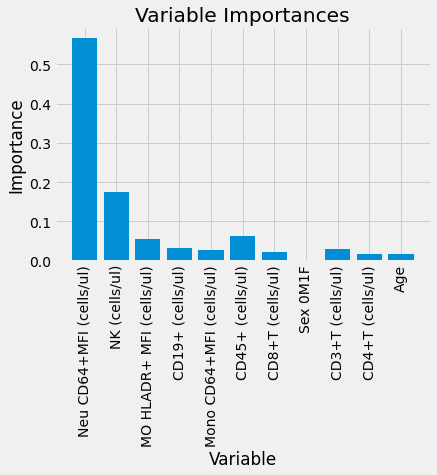

In [31]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [32]:
!pip install kaggle

In [33]:
!mkdir .kaggle
# !echo '{"username":"...","key":"..."}' > .kaggle/kaggle.json

!echo {"username":"elvischan","key":"5e773b0893f0043ed2defa458c517730"} > .kaggle/kaggle.json

!cat .kaggle/kaggle.json

username:elvischan key:5e773b0893f0043ed2defa458c517730


In [34]:
%env KAGGLE_USERNAME=elvischan
%env KAGGLE_KEY=5e773b0893f0043ed2defa458c517730

env: KAGGLE_USERNAME=elvischan
env: KAGGLE_KEY=5e773b0893f0043ed2defa458c517730


%env KAGGLE_USERNAME=elvischan
%env KAGGLE_KEY=5e773b0893f0043ed2defa458c517730

In [35]:
predictions

array([0.065, 0.398, 0.008, 0.166, 0.098, 0.049, 0.05 , 0.217, 0.29 ,
       0.1  , 0.065, 0.654, 0.186, 0.05 , 0.288, 0.086, 0.244, 0.044,
       0.16 , 0.135, 0.911, 0.857, 0.511, 0.224, 0.189, 1.   , 0.307,
       0.229, 0.915, 0.045, 0.722, 0.998, 0.093, 0.956, 0.273, 0.116,
       0.042, 0.638, 0.996, 0.083, 0.997, 0.537, 0.248, 0.099, 0.207,
       0.078, 0.239, 0.773, 0.264, 0.106, 0.173, 0.059, 0.055, 0.129,
       0.435, 0.054, 0.343, 0.047, 0.999])

In [36]:
import numpy as np
import pandas as pd

df = pd.DataFrame(prediction_string, columns = ['label'])

In [37]:
df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [38]:
df.index.names = ['id']

In [39]:
df.head()

,label
id,
0,0
1,0
2,0
3,0
4,0


In [40]:
df.to_csv('submission.csv')

In [41]:
df

,label
id,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
